In [1]:
!pip install kaggle

In [2]:
# !pwd # to seee the path of current directory 
# !ls
# cd sample_data
# cd .. # to go back a directory 

SyntaxError: ignored

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"prashantjha000","key":"3d2fc2e22fbfa8a929ca86970d5dea07"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
#change the permission 
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:33<00:00, 61.1MB/s]
100% 2.29G/2.29G [00:33<00:00, 72.8MB/s]


In [6]:
from zipfile import ZipFile
file_name="kaggle.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("done")

done


In [ ]:
"!ls

In [7]:
#clone github repo
!git clone https://github.com/ieee8023/covid-chestxray-dataset.git

Cloning into 'covid-chestxray-dataset'...
remote: Enumerating objects: 3641, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 3641 (delta 4), reused 6 (delta 2), pack-reused 3629
Receiving objects: 100% (3641/3641), 632.97 MiB | 42.86 MiB/s, done.
Resolving deltas: 100% (1446/1446), done.
Checking out files: 100% (1174/1174), done.


In [12]:
cd covid_chest

/content/covid_data


In [ ]:
!ls

chest_kaggle.zip  chest_xray  covid-chestxray-dataset  kaggle.json  sample_data


In [13]:
!rm -rf annotations docs  scripts tests  #to remove files/ folders

In [28]:
cd ..


/content


In [10]:
import pandas as pd
import shutil
import os
import matplotlib
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [12]:
FILE_PATH="covid-chest/metadata.csv"
IMAGE_PATH="covid-chest/images"

In [14]:
df=pd.read_csv(FILE_PATH)
print(df.shape)

(950, 30)


In [15]:
#TARGET_DIR="dataset/validation/covid"
#TARGET_DIR="dataset/validation/normal"
TARGET_DIR1="dataset"
TARGET_DIR2="dataset/covid"
TARGET_DIR3="dataset/normal"
TARGET_DIR5="dataset/train"
TARGET_DIR6="dataset/validation"

TARGET_DIR7="dataset/train/covid"
TARGET_DIR8="dataset/train/normal"

TARGET_DIR10="dataset/validation/covid"
TARGET_DIR11="dataset/validation/normal""

os.mkdir(TARGET_DIR1)
os.mkdir(TARGET_DIR2)
os.mkdir(TARGET_DIR3)
os.mkdir(TARGET_DIR5)
os.mkdir(TARGET_DIR6)
os.mkdir(TARGET_DIR7)
os.mkdir(TARGET_DIR8)
os.mkdir(TARGET_DIR10)
os.mkdir(TARGET_DIR11)


In [16]:
df.head(10)

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN
5,4,5.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 30, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1b.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive diffuse interstitial opacities and...,NaN,NaN
6,5,NaN,NaN,NaN,Pneumonia,NaN,NaN,Y,Y,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,2017,NaN,images,ARDSSevere.png,NaN,https://en.wikipedia.org/wiki/File:ARDSSevere.png,CC BY-SA,Severe ARDS. Person is intubated with an OG in...,NaN,NaN
7,6,0.0,NaN,NaN,Pneumonia/Viral/COVID-19,Y,NaN,Y,Y,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 6, 2020","Wuhan Jinyintan Hospital, Wuhan, Hubei Provinc...",images,lancet-case2a.jpg,10.1016/S0140-6736(20)30211-7,https://www.thelancet.com/journals/lancet/arti...,NaN,Case 2: chest x-ray obtained on Jan 6 (2A). Th...,NaN,NaN
8,6,4.0,NaN,NaN,Pneumonia/Viral/COVID-19,Y,NaN,Y,Y,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 10, 2020","Wuhan Jinyintan Hospital, Wuhan, Hubei Provinc...",images,lancet-case2b.jpg,10.1016/S0140-6736(20)30211-7,https://www.thelancet.com/journals/lancet/arti...,NaN,Case 2: chest x-ray obtained on Jan 6 (2A). Th...,NaN,NaN
9,3,4.0,M,74.0,Pneumonia/Viral/SARS,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,38.0,NaN,NaN,NaN,NaN,AP,X-ray,2004,"Mount Sinai Hospital, Toronto, Ontario, Canada",images,SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0....,10.1148/rg.242035193,https://pubs.rsna.org/doi/10.1148/rg.242035193,NaN,SARS in a 74-year-old man who developed sympto...,NaN,NaN


In [94]:
TARGET_DIR="dataset/covid"
if not os.path.exists(TARGET_DIR):
    os.mkdir(TARGET_DIR)
    print("covid folder created")
s=set()
for (i,row) in df.iterrows():

    s.add(row['view'])
print(s)
allowed=[""]

{'Axial', 'AP Erect', 'Coronal', 'L', 'AP', 'AP Supine', 'PA'}


In [95]:
allowed=["AP","AP Supine","PA","AP Erect"]

In [88]:
# !rm -rf dataset/normal
!rm -rf dataset/validation/pneumonia

In [19]:
cnt =0
for(i,row) in df.iterrows():
    if ("COVID-19" in row["finding"].split('/')) and row["modality"]=='X-ray' and (row["view"] in allowed):
        filename=row["filename"]
        if(os.path.isfile(IMAGE_PATH+"/"+filename)):
            image_path=os.path.join(IMAGE_PATH,filename)
            image_copy_path=os.path.join(TARGET_DIR,filename)
            shutil.copy2(image_path,image_copy_path)
            cnt+=1

In [20]:
print(cnt)

478


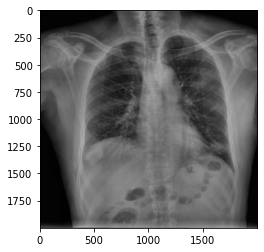

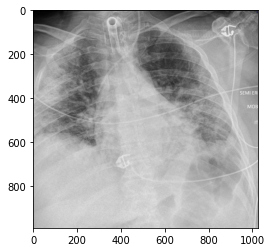

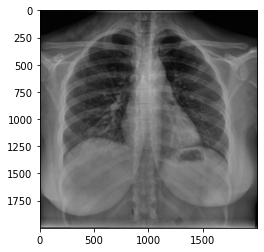

In [21]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

x=0
for file in os.listdir(TARGET_DIR):
    img = mpimg.imread("dataset/covid/"+file)
    plt.figure()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    #imgplot = plt.imshow(img)
    x+=1
    if(x==3):
        break


In [83]:
# import random
# !rm dataset/train/covid/*
# !rm dataset/train/normal/*
# !rm dataset/train/pneumonia/*

# !rm dataset/validation/covid/*
# !rm dataset/validation/normal/*
# !rm dataset/validation/pneumonia/*

In [24]:
KAGGLE_FILE_PATH="kaggle/train/NORMAL"
TARGET_NORMAL_DIR="dataset/normal"

In [26]:
import random
image_names=os.listdir(KAGGLE_FILE_PATH)
random.shuffle(image_names)
print(cnt)

478


In [27]:
for i in range(cnt):
    image_name=image_names[i]
    image_path=os.path.join(KAGGLE_FILE_PATH,image_name)
    target_path=os.path.join(TARGET_NORMAL_DIR,image_name)
    shutil.copy2(image_path,target_path)

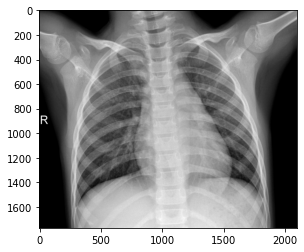

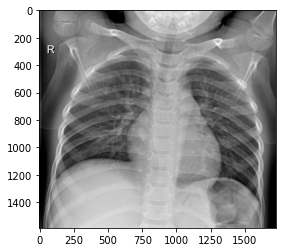

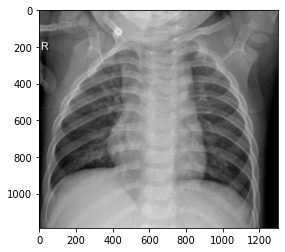

In [28]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

x=0
for file in os.listdir(TARGET_NORMAL_DIR):
    img = mpimg.imread("dataset/normal/"+file)
    plt.figure()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    #plt.imshow(img)
    x+=1
    if(x==3):
        break


In [96]:

COVID_FILE_PATH="dataset/covid"
TARGET_COVID_DIR="dataset/train/covid"
TARGET_COVID_VAL="dataset/validation/covid"
x=int(0.2*cnt)
y=cnt-x
image_names=os.listdir(COVID_FILE_PATH)
random.shuffle(image_names)

In [97]:

for i in range(y):
    image_name=image_names[i]
    image_path=os.path.join(COVID_FILE_PATH,image_name)
    target_path=os.path.join(TARGET_COVID_DIR,image_name)
    shutil.copy2(image_path,target_path)
    
for i in range(x):
    image_name=image_names[y+i]
    image_path=os.path.join(COVID_FILE_PATH,image_name)
    target_path=os.path.join(TARGET_COVID_VAL,image_name)
    shutil.copy2(image_path,target_path)

In [98]:

FILE_PATH="dataset/normal"
TARGET_DIR="dataset/train/normal"
TARGET_VAL="dataset/validation/normal"
x=int(0.2*cnt)
y=cnt-x
image_names=os.listdir(FILE_PATH)
random.shuffle(image_names)

In [99]:

for i in range(y):
    image_name=image_names[i]
    image_path=os.path.join(FILE_PATH,image_name)
    target_path=os.path.join(TARGET_DIR,image_name)
    shutil.copy2(image_path,target_path)
    
for i in range(x):
    image_name=image_names[y+i]
    image_path=os.path.join(FILE_PATH,image_name)
    target_path=os.path.join(TARGET_VAL,image_name)
    shutil.copy2(image_path,target_path)

In [89]:

TRAIN_PATH="dataset/train"
VAL_PATH="dataset/validation"

In [149]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import pandas as pd
import shutil
import os
import matplotlib
%matplotlib inline
from keras.utils import normalize
from keras.layers import Concatenate
from keras import Input
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D,Activation,MaxPooling2D

from keras.callbacks import ModelCheckpoint


In [150]:
#rm -rf `find -type d -name .ipynb_checkpoints`
 

In [151]:
from keras.applications.resnet50 import preprocess_input
train_datagen=image.ImageDataGenerator(dtype='float32',preprocessing_function=preprocess_input)
test_datagen=image.ImageDataGenerator(dtype='float32',preprocessing_function=preprocess_input)

In [152]:
train_generator=train_datagen.flow_from_directory(
    'dataset/train',target_size=(224,224),batch_size=32,class_mode='binary'
    )


Found 766 images belonging to 2 classes.


In [153]:
train_generator.class_indices

{'covid': 0, 'normal': 1}

In [154]:
validation_generator=test_datagen.flow_from_directory(
    'dataset/validation',target_size=(224,224),batch_size=32,class_mode='binary'
    
)

Found 190 images belonging to 2 classes.


In [155]:
validation_generator.class_indices

{'covid': 0, 'normal': 1}

In [156]:
from keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode="auto",patience=3,restore_best_weights=True)

In [157]:
from keras.applications.resnet50 import ResNet50
model = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3))

In [158]:
av1 = GlobalAveragePooling2D()(model.output)
fc1 = Dense(256,activation='relu')(av1)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(1,activation='softmax')(d1)

model_new = Model(inputs=model.input, outputs= fc2)
model_new.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [159]:
from keras.optimizers import Adam
adam = Adam(lr=0.00003)
model_new.compile(loss=keras.losses.binary_crossentropy, optimizer=adam, metrics=['accuracy'])
hist=model_new.fit_generator( 
    train_generator,
    steps_per_epoch=24,epochs=15,validation_data=validation_generator,
    validation_steps=6,
    callbacks=[early_stop])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
24/24 [==============================] - 36s 1s/step - loss: 0.5778 - accuracy: 0.7218 - val_loss: 0.6633 - val_accuracy: 0.6632
Epoch 2/15
24/24 [==============================] - 28s 1s/step - loss: 0.0562 - accuracy: 0.9866 - val_loss: 0.6508 - val_accuracy: 0.7579
Epoch 3/15
24/24 [==============================] - 28s 1s/step - loss: 0.0263 - accuracy: 0.9942 - val_loss: 0.2648 - val_accuracy: 0.8947
Epoch 4/15
24/24 [==============================] - 28s 1s/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.0942 - val_accuracy: 0.9579
Epoch 5/15
24/24 [==============================] - 28s 1s/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0444 - val_accuracy: 0.9895
Epoch 6/15
24/24 [==============================] - 28s 1s/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0259 - val_accuracy: 0.9895
Epoch 7/15
24/24 [==============================] - 29s 1s/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 8/15
24/24 [==

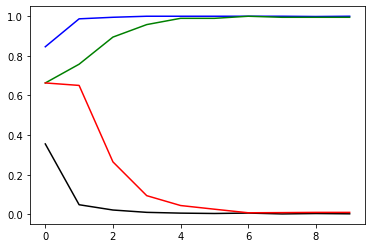

In [160]:
plt.figure(0)
plt.plot(hist.history['accuracy'],'b')
plt.plot(hist.history['val_accuracy'],'g')
plt.plot(hist.history['loss'],'black')
plt.plot(hist.history['val_loss'],'red')
plt.show()

In [161]:
model_new.save("modelt.h5")

In [162]:
modelt=load_model('modelt.h5')
modelt.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.00284108379855752, 1.0]

In [163]:

modelt.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.00284108379855752, 1.0]

In [175]:
modelt.evaluate(validation_generator)

6/6 [==============================] - 5s 802ms/step - loss: 0.0078 - accuracy: 1.0000


[0.007771995384246111, 1.0]

In [192]:
y_actual=[]
y_test=[]

In [193]:

for i in os.listdir("./dataset/validation/normal/"):
    img=image.load_img("./dataset/validation/normal/"+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    p=modelt.predict(img)
    if (p[[0]]>=0.5):
      y_test.append(1)
    else:
      y_test.append(0)
    y_actual.append(1)
for i in os.listdir("./dataset/validation/covid/"):
    img=image.load_img("./dataset/validation/covid/"+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    p=modelt.predict(img)
    if (p[[0]]<0.5):
      y_test.append(0)
    else:
      y_test.append(1)
    y_actual.append(0)


In [194]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)
print(y_actual,y_test)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0] [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]


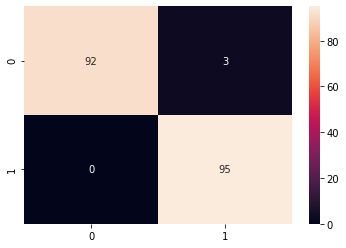

In [195]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_actual,y_test)
import seaborn as sns
sns.heatmap(cm,annot=True)